In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yeomsangyoon/Visual Studio/0_tensor/source/PAMAP_features.csv", index_col=0)
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [3]:
df.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

sub_id
5    1651
2    1618
8    1576
6    1556
1    1518
7    1430
4    1353
3    1042
9      29
Name: count, dtype: int64 

Subject Count: 9


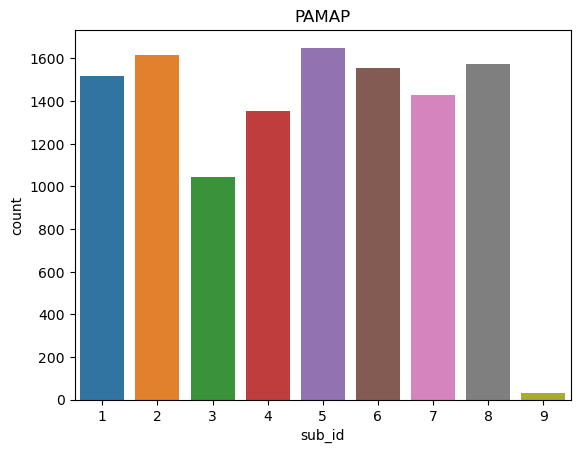

In [4]:
# sub_id 레이블 개수 확인 (숫자)
print(df['sub_id'].value_counts(),"\n")

# sub_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="sub_id")
plt.xlabel("sub_id")
plt.title("PAMAP")

# sub_id subject 개수 확인
subject_count = df['sub_id'].nunique()
print("Subject Count:", subject_count)

activity_id
17    1539
4     1525
3     1220
1     1203
7     1196
2     1162
16    1099
6     1035
5      593
12     522
13     428
24     251
Name: count, dtype: int64 

Subject Count: 12


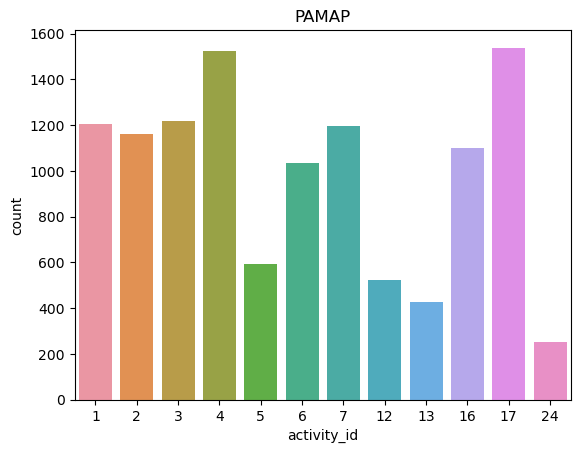

In [5]:
# activity_id 레이블 개수 확인 (숫자)
print(df['activity_id'].value_counts(),"\n")

# activity_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="activity_id")
plt.xlabel("activity_id")
plt.title("PAMAP")

# activity_id subject 개수 확인
subject_count = df['activity_id'].nunique()
print("Subject Count:", subject_count)

act_level
moderate    5283
light       5124
vigorous    1366
Name: count, dtype: int64 

Subject Count: 3


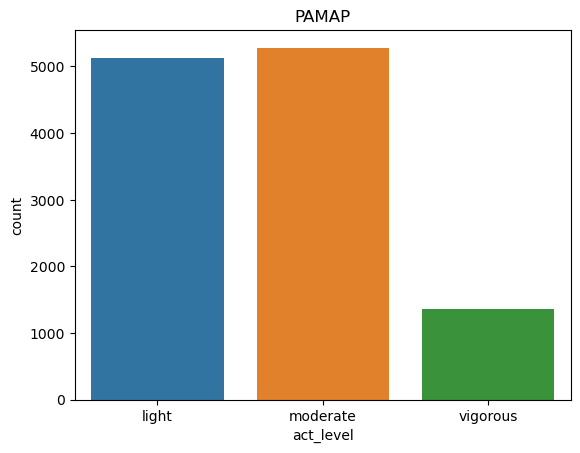

In [6]:
# act_level 레이블 개수 확인 (숫자)
print(df['act_level'].value_counts(),"\n")

# activity_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="act_level")
plt.xlabel("act_level")
plt.title("PAMAP")

# activity_id subject 개수 확인
subject_count = df['act_level'].nunique()
print("Subject Count:", subject_count)

In [7]:
# 라벨 인코딩 (숫자가 일련의 순서대로 배치되어 있지 않은 activity_id와, 문자형 데이터로 라벨링이 되어 있는 act_level 라벨이 라벨링 필요.)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


Text(0.5, 1.0, 'PAMAP')

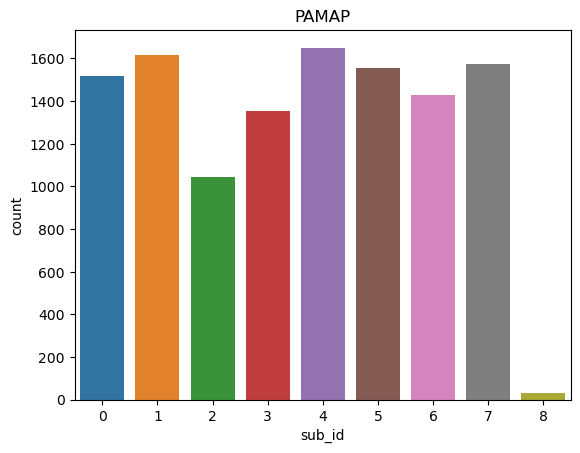

In [9]:
# 라벨링 결과 확인
# sub_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="sub_id")
plt.xlabel("sub_id")
plt.title("PAMAP")

Text(0.5, 1.0, 'PAMAP')

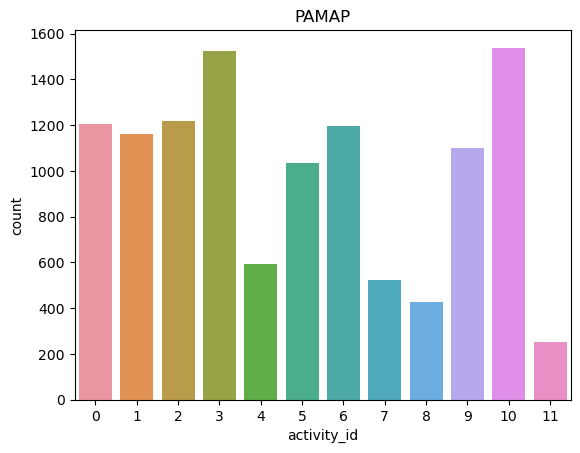

In [10]:
# 라벨링 결과 확인
# activity_id 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="activity_id")
plt.xlabel("activity_id")
plt.title("PAMAP")

Text(0.5, 1.0, 'PAMAP')

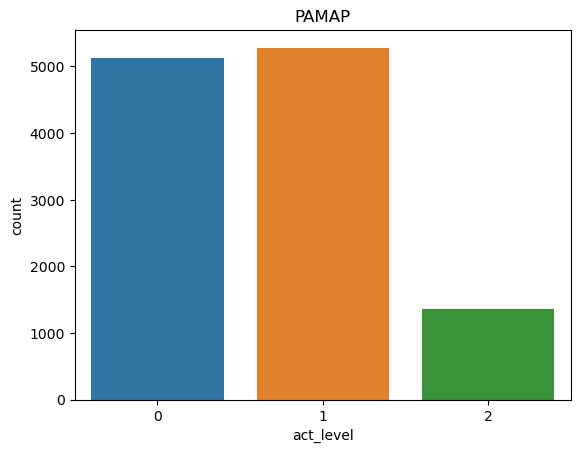

In [11]:
# 라벨링 결과 확인
# act_level 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="act_level")
plt.xlabel("act_level")
plt.title("PAMAP")

In [12]:
# 결측치 확인
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [13]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [14]:
# X,y 분류

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('sub_id',axis=1)
X = df.drop('act_level',axis=1)
print(X.head())

y = df['act_level']
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

       sub_id  activity_id     hr_mean  hr_mean_normal    hr_std  \
3006        1           10   87.000000        1.175676  0.000000   
3497        1            3  124.605469        1.683858  0.927920   
14495       6            4  113.493430        1.891557  2.315888   
13278       6           10   82.513672        1.375228  0.492657   
14969       7            2   73.000000        1.106061  0.000000   

       hr_std_normal  hand_tmp_mean  hand_tmp_std  hand_acc_x_mean  \
3006    7.105427e-15        34.3750           0.0        -1.165524   
3497    1.253946e-02        31.8750           0.0       -12.040995   
14495   3.859813e-02        32.5000           0.0        -3.723040   
13278   8.210948e-03        33.8125           0.0        -3.618932   
14969   7.327472e-15        34.4375           0.0        -9.275877   

       hand_acc_x_std  ...  ankle_acc_xz_cor  hand_gyr_xy_cor  \
3006         2.383779  ...          0.233251        -0.472662   
3497         3.734766  ...         -0.11

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
#로지스틱

In [18]:
import warnings
warnings.filterwarnings('ignore')

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---", "\n")
print ("Accuracy Score : ", accuracy_score(y_test, pred_lr),"\n")
print (confusion_matrix(y_test, pred_lr),"\n")


#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))


--- Logistic Regression Classifier --- 

Accuracy Score :  0.9911684782608695 

[[1246    4    0]
 [   9 1328    5]
 [   0    8  344]] 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1250
           1       0.99      0.99      0.99      1342
           2       0.99      0.98      0.98       352

    accuracy                           0.99      2944
   macro avg       0.99      0.99      0.99      2944
weighted avg       0.99      0.99      0.99      2944



In [19]:
#decision tree

In [20]:
import warnings
warnings.filterwarnings('ignore')

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---", "\n")
print ("Accuracy Score : ", accuracy_score(y_test, pred_dt),"\n")
print (confusion_matrix(y_test, pred_dt),"\n")

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier --- 

Accuracy Score :  0.9925271739130435 

[[1244    6    0]
 [   2 1334    6]
 [   0    8  344]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       0.99      0.99      0.99      1342
           2       0.98      0.98      0.98       352

    accuracy                           0.99      2944
   macro avg       0.99      0.99      0.99      2944
weighted avg       0.99      0.99      0.99      2944



In [21]:
#random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---", "\n")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_dt = rf_clf.predict(X_test)
print ("Accuracy Score : ", accuracy_score(y_test, pred_dt),"\n")
print (confusion_matrix(y_test, pred_dt),"\n")

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- Radom Forest --- 

Accuracy Score :  0.9993206521739131 

[[1250    0    0]
 [   0 1342    0]
 [   0    2  350]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1342
           2       1.00      0.99      1.00       352

    accuracy                           1.00      2944
   macro avg       1.00      1.00      1.00      2944
weighted avg       1.00      1.00      1.00      2944



In [23]:
# SVM Classifier

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("\n--- SVM Classifier ---", "\n")
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_dt = clf_svm.predict(X_test)
print ("Accuracy Score : ", accuracy_score(y_test, pred_dt),"\n")
print (confusion_matrix(y_test, pred_dt),"\n")

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dt))


--- SVM Classifier --- 

Accuracy Score :  0.9419157608695652 

[[1237   13    0]
 [  18 1314   10]
 [   0  130  222]] 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1250
           1       0.90      0.98      0.94      1342
           2       0.96      0.63      0.76       352

    accuracy                           0.94      2944
   macro avg       0.95      0.87      0.90      2944
weighted avg       0.94      0.94      0.94      2944



In [25]:
# 정규화 standard scaler

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # 특성 데이터를 표준화
# std_scaled_data = scaler.fit_transform(df)

# print(std_scaled_data)